In [1]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier
import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [2]:
# Initialize the KNeighborsClassifier
knn_classifier = MyKNeighborsClassifier()
dummy_classifier = MyDummyClassifier()
naive_class = MyNaiveBayesClassifier()
tree_classifier = MyDecisionTreeClassifier()

## Step 0:

Preprocessing and data cleaning

In [19]:
table = MyPyTable().csv_to_mypytable("input_file/fifa_players.csv")

rating_column = table.get_column("overall_rating")
indexes_to_drop = [index for index, row in enumerate(rating_column) if int(row) < 70] 
print(indexes_to_drop)
print("size before: " , len(table.data))
table.drop_rows(indexes_to_drop)
print("size after: " , len(table.data))


table.remove_column("name")
table.remove_column("full_name")
table.remove_column("birth_date")
table.remove_column("age")
table.remove_column("weight_kgs")
table.remove_column("nationality")
table.remove_column("overall_rating")
table.remove_column("potential")
table.remove_column("value_euro")
table.remove_column("wage_euro")
table.remove_column("preferred_foot")
table.remove_column("international_reputation(1-5)")
table.remove_column("weak_foot(1-5)")
table.remove_column("body_type")
table.remove_column("release_clause_euro")
table.remove_column("national_team")
table.remove_column("national_rating")
table.remove_column("national_team_position")
table.remove_column("national_jersey_number")
table.remove_column("heading_accuracy")
table.remove_column("volleys")
table.remove_column("curve")
table.remove_column("sprint_speed")
table.remove_column("reactions")
table.remove_column("balance")
table.remove_column("jumping")
table.remove_column("strength")
table.remove_column("aggression")
table.remove_column("penalties")
table.remove_column("composure")
table.remove_column("sliding_tackle")

positions = table.get_column("positions")
discretized_positions = []
for position in positions:
    discretized_positions.append(myutils.classify_position(position))

print(discretized_positions)
table.pretty_print()
print("size after: " , len(table.data))

[1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 172

In [ ]:
naive_class.header = [
    "height_cm",
    "positions",
    "skill_moves(1-5)",
    "crossing",
    "finishing",
    "short_passing",
    "dribbling",
    "freekick_accuracy",
    "long_passing",
    "ball_control",
    "acceleration",
    "agility",
    "shot_power",
    "stamina",
    "long_shots",
    "interceptions",
    "positioning",
    "vision",
    "marking",
    "standing_tackle"
]
# List of columns to include in the combined list
columns_to_include = [
    "height_cm",
    "positions",
    "skill_moves(1-5)",
    "crossing",
    "finishing",
    "short_passing",
    "dribbling",
    "freekick_accuracy",
    "long_passing",
    "ball_control",
    "acceleration",
    "agility",
    "shot_power",
    "stamina",
    "long_shots",
    "interceptions",
    "positioning",
    "vision",
    "marking",
    "standing_tackle"
]

# Extract the indices of the specified columns
column_indices = [table.column_names.index(col) for col in columns_to_include]
# Construct the combined list directly from the table data
combined_list = [[row[id] for id in column_indices] for row in table.data]
# Extract the target 
target = discretized_positions

myutils.perform_analysis(combined_list, target,knn_classifier, dummy_classifier, naive_class, tree_classifier)

(BONUS) Stratified 10-Fold Cross Validation
Accuracy and Error Rate
k Nearest Neighbors Classifier: accuracy = 0.22, error rate = 0.78
Dummy Classifier: accuracy = 0.35, error rate = 0.65
Naive Classifier: accuracy = 0.92, error rate = 0.08
Tree Classifier: accuracy = 0.95, error rate = 0.05
Precision, recall, and F1 measure
kNN Classifier: recall = 0.00, precision = 0.00, F1 = 0.00
Dummy Classifier: recall = 0.00, precision = 0.00, F1 = 0.00
Naive Classifier: recall = 0.97, precision = 1.00, F1 = 0.99
Tree Classifier: recall = 1.00, precision = 1.00, F1 = 1.00


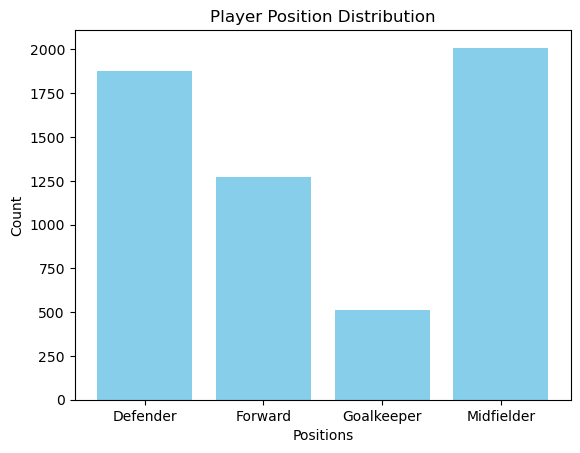

In [18]:
import importlib
import mysklearn.plot_utils

# Reload the plot_utils module
importlib.reload(mysklearn.plot_utils)

# Assuming `discretized_positions` is already computed
# Compute the frequencies of the discretized positions
unique_positions, counts = mysklearn.plot_utils.get_frequencies(discretized_positions)

# Plot the histogram
mysklearn.plot_utils.plot_histogram(
    unique_positions, 
    counts, 
    title="Player Position Distribution", 
    xlabel="Positions", 
    ylabel="Count"
)

In [ ]:
# downsampling defender, foward, and midfiedler to size of goalkeeper
# dummy will have 25% and this is our baseline 
# seed random 
# random.sample